In [182]:
import pandas as pd
import numpy as np
from src import data_cleaning as dc
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [11]:
people_df = pd.read_csv('src/data/baseballdatabank-master/core/People.csv')
batting_df = pd.read_csv('src/data/baseballdatabank-master/core/Batting.csv')
fielding_df = pd.read_csv('src/data/baseballdatabank-master/core/Fielding.csv')

In [15]:
# initial drop
batting_df2 = dc.initial_drop(batting_df)
batting_df2.head()

playerID  yearID   G   AB   R   H  2B  3B  HR   RBI   SB   CS  BB   SO  \
0  abercda01    1871   1    4   0   0   0   0   0   0.0  0.0  0.0   0  0.0   
1   addybo01    1871  25  118  30  32   6   0   0  13.0  8.0  1.0   4  0.0   
2  allisar01    1871  29  137  28  40   4   5   0  19.0  3.0  1.0   2  5.0   
3  allisdo01    1871  27  133  28  44  10   2   2  27.0  1.0  1.0   0  2.0   
4  ansonca01    1871  25  120  29  39  11   3   0  16.0  6.0  2.0   2  1.0   

   IBB  HBP  SH  SF  GIDP  
0  NaN  NaN NaN NaN   0.0  
1  NaN  NaN NaN NaN   0.0  
2  NaN  NaN NaN NaN   1.0  
3  NaN  NaN NaN NaN   0.0  
4  NaN  NaN NaN NaN   0.0

In [16]:
# combine stints into single year collection
batting_df3 = dc.combine_stints(batting_df2)
batting_df3.head()

Combining multiple stints into single years...


playerID  yearID   G  AB  R  H  2B  3B  HR  RBI   SB   CS  BB   SO  IBB  \
0  aardsda01    2004  11   0  0  0   0   0   0  0.0  0.0  0.0   0  0.0  0.0   
1  aardsda01    2006  45   2  0  0   0   0   0  0.0  0.0  0.0   0  0.0  0.0   
2  aardsda01    2007  25   0  0  0   0   0   0  0.0  0.0  0.0   0  0.0  0.0   
3  aardsda01    2008  47   1  0  0   0   0   0  0.0  0.0  0.0   0  1.0  0.0   
4  aardsda01    2009  73   0  0  0   0   0   0  0.0  0.0  0.0   0  0.0  0.0   

   HBP   SH   SF  GIDP  
0  0.0  0.0  0.0   0.0  
1  0.0  1.0  0.0   0.0  
2  0.0  0.0  0.0   0.0  
3  0.0  0.0  0.0   0.0  
4  0.0  0.0  0.0   0.0

In [223]:
# map each player's most common position to their batting stats
bat_with_pos_df = dc.map_position(batting_df3, fielding_df)
bat_with_pos_df.head()

Mapping positions to batting stats...


playerID  yearID    G   AB    R    H  2B  3B  HR    RBI   SB   CS  BB  \
9   aaronha01    1954  122  468   58  131  27   6  13   69.0  2.0  2.0  28   
10  aaronha01    1955  153  602  105  189  37   9  27  106.0  3.0  1.0  49   
11  aaronha01    1956  153  609  106  200  34  14  26   92.0  2.0  4.0  37   
12  aaronha01    1957  151  615  118  198  27   6  44  132.0  1.0  1.0  57   
13  aaronha01    1958  153  601  109  196  34   4  30   95.0  4.0  1.0  59   

      SO   IBB  HBP   SH   SF  GIDP pos  
9   39.0   0.0  3.0  6.0  4.0  13.0  OF  
10  61.0   5.0  3.0  7.0  4.0  20.0  OF  
11  54.0   6.0  2.0  5.0  7.0  21.0  OF  
12  58.0  15.0  0.0  0.0  3.0  13.0  OF  
13  49.0  16.0  1.0  0.0  3.0  21.0  OF

In [119]:
bat_with_pos_df['avg'] = bat_with_pos_df['H'] / bat_with_pos_df['AB']

playerID  yearID    G   AB    R    H  2B  3B  HR    RBI    ...     \
9      aaronha01    1954  122  468   58  131  27   6  13   69.0    ...      
10     aaronha01    1955  153  602  105  189  37   9  27  106.0    ...      
11     aaronha01    1956  153  609  106  200  34  14  26   92.0    ...      
12     aaronha01    1957  151  615  118  198  27   6  44  132.0    ...      
13     aaronha01    1958  153  601  109  196  34   4  30   95.0    ...      
14     aaronha01    1959  154  629  116  223  46   7  39  123.0    ...      
15     aaronha01    1960  153  590  102  172  20  11  40  126.0    ...      
16     aaronha01    1961  155  603  115  197  39  10  34  120.0    ...      
17     aaronha01    1962  156  592  127  191  28   6  45  128.0    ...      
18     aaronha01    1963  161  631  121  201  29   4  44  130.0    ...      
19     aaronha01    1964  145  570  103  187  30   2  24   95.0    ...      
20     aaronha01    1965  150  570  109  181  40   1  32   89.0    ...      
21     aaronha01    1966  158  603  117  168  23   1  44  127.0    ...      
22     aaronha01    1967  155  600  113  184  37   3  39  109.0    ...      
23     aaronha01    1968  160  606   84  174  33   4  29   86.0    ...      
24     aaronha01    1969  147  547  100  164  30   3  44   97.0    ...      
25     aaronha01    1970  150  516  103  154  26   1  38  118.0    ...      
26     aaronha01    1971  139  495   95  162  22   3  47  118.0    ...      
27     aaronha01    1972  129  449   75  119  10   0  34   77.0    ...      
28     aaronha01    1973  120  392   84  118  12   1  40   96.0    ...      
29     aaronha01    1974  112  340   47   91  16   0  20   69.0    ...      
30     aaronha01    1975  137  465   45  109  16   2  12   60.0    ...      
31     aaronha01    1976   85  271   22   62   8   0  10   35.0    ...      
32     aaronto01    1962  141  334   54   77  20   2   8   38.0    ...      
33     aaronto01    1963   72  135    6   27   6   1   1   15.0    ...      
34     aaronto01    1965    8   16    1    3   0   0   0    1.0    ...      
35     aaronto01    1968   98  283   21   69  10   3   1   25.0    ...      
36     aaronto01    1969   49   60   13   15   2   0   1    5.0    ...      
37     aaronto01    1970   44   63    3   13   2   0   2    7.0    ...      
38     aaronto01    1971   25   53    4   12   2   0   0    3.0    ...      
...          ...     ...  ...  ...  ...  ...  ..  ..  ..    ...    ...      
96555  zoskyed01    2000    4    4    0    0   0   0   0    0.0    ...      
96567  zuberjo01    1996   30   91    7   23   4   0   1   10.0    ...      
96568  zuberjo01    1998   38   45    6   11   3   1   2    6.0    ...      
96569  zuletju01    2000   30   68   13   20   8   0   3   12.0    ...      
96570  zuletju01    2001   49  106   11   23   3   0   6   24.0    ...      
96576  zuninmi01    2013   52  173   22   37   5   0   5   14.0    ...      
96577  zuninmi01    2014  131  438   51   87  20   2  22   60.0    ...      
96578  zuninmi01    2015  112  350   28   61  11   0  11   28.0    ...      
96579  zuninmi01    2016   55  164   16   34   7   0  12   31.0    ...      
96580  zuninmi01    2017  124  387   52   97  25   0  25   64.0    ...      
96581  zupcibo01    1991   18   25    3    4   0   0   1    3.0    ...      
96582  zupcibo01    1992  124  392   46  108  19   1   3   43.0    ...      
96583  zupcibo01    1993  141  286   40   69  24   2   2   26.0    ...      
96584  zupcibo01    1994   36   92   10   18   4   1   1    8.0    ...      
96585   zupofr01    1957   10   12    2    1   0   0   0    0.0    ...      
96586   zupofr01    1958    1    2    0    0   0   0   0    0.0    ...      
96587   zupofr01    1961    5    4    1    2   1   0   0    0.0    ...      
96588  zuvelpa01    1982    2    1    0    0   0   0   0    0.0    ...      
96589  zuvelpa01    1983    3    5    0    0   0   0   0    0.0    ...      
96590  zuvelpa01    1984   11   25    2    5   1   0   0    1.0    ...      
9659

In [120]:
# def condense_df(df0):
#     df = df0.set_index('playerID')
#     player_list = []
#     for player in df.index.unique():
#         def_dict = defaultdict(str)
#         def_dict['playerID'] = player   
#         if isinstance(df.loc[player, 'pos'], str):
#             def_dict['pos'] = df.loc[player, 'pos']
#         else:
#             def_dict['pos'] = df.loc[player, 'pos'].unique()[0]
            
#         for col in df.columns:
#             if col == 'yearID' or col == 'pos':
#                 continue
#             try:
#                 for i, v in enumerate(df.loc[player, col]):
#                     if i > 6:
#                         continue
#                     key = 'year' + str(i + 1) + '_' + col
#                     def_dict[key] = v
#             except:
#                 continue # skip players with only 1 year of data
#         player_list.append(def_dict)
#     new_df = pd.DataFrame(player_list)
#     return new_df.dropna() #drop players without 7 years of data

In [137]:
test_df = dc.condense_df(bat_with_pos_df)

playerID  year1_2B  year1_3B  year1_AB  year1_BB  year1_CS  year1_G  \
0      aaronha01      27.0       6.0     468.0      28.0       2.0    122.0   
1      aaronto01      20.0       2.0     334.0      41.0       0.0    141.0   
4      abbated01       0.0       0.0      10.0       1.0       0.0      3.0   
8      abbotku01       1.0       0.0      61.0       3.0       0.0     20.0   
15     abramca01       1.0       0.0      24.0       7.0       0.0      8.0   
16     abreubo01       1.0       0.0      22.0       2.0       0.0     15.0   
23     adairje01       0.0       0.0      19.0       1.0       0.0     11.0   
26     adamsbe01       0.0       0.0      13.0       0.0       0.0      5.0   
27     adamsbo03      13.0       3.0     311.0      18.0       0.0     94.0   
34     adamsgl01       2.0       1.0      90.0      11.0       0.0     61.0   
43     adamssp01       0.0       1.0      44.0       4.0       2.0     11.0   
45     adcocjo01      16.0       1.0     372.0      24.0       0.0    102.0   
57      ageeto01       0.0       0.0      14.0       0.0       0.0      5.0   
60     agnewsa01       9.0       5.0     307.0      20.0       0.0    105.0   
61     aguaylu01       1.0       2.0      47.0       2.0       1.0     20.0   
66     aikenwi01       4.0       0.0      91.0      10.0       2.0     42.0   
68     ainsmed01       1.0       2.0     104.0       6.0       0.0     33.0   
80     aldremi01      18.0       3.0     216.0      33.0       3.0     84.0   
84     alexaga01       0.0       0.0       3.0       1.0       0.0      3.0   
92     alfoned01      13.0       5.0     335.0      12.0       1.0    101.0   
95     alicelu01      10.0       4.0     297.0      25.0       1.0     93.0   
96     allanan01       7.0       3.0     293.0      14.0       1.0    101.0   
97     allenbe01      27.0       7.0     573.0      62.0       1.0    159.0   
98     allenbo01      15.0      11.0     456.0      87.0       0.0    133.0   
101    allench01      21.0       3.0     481.0      37.0       7.0    137.0   
102    allendi01       2.0       1.0      24.0       0.0       0.0     10.0   
104    allenet01       1.0       0.0      13.0       0.0       0.0     18.0   
105    allenga01      10.0       2.0     241.0      20.0       1.0    108.0   
108    allenha02       0.0       0.0      31.0       3.0       0.0      9.0   
121    alleyge01       1.0       0.0      51.0       2.0       1.0     17.0   
...          ...       ...       ...       ...       ...       ...      ...   
10051  youngba01       0.0       0.0       1.0       0.0       0.0      1.0   
10053  youngch04       4.0       0.0      70.0       6.0       1.0     30.0   
10056  youngde03       9.0       1.0     126.0       1.0       2.0     30.0   
10059  youngdm01       0.0       0.0      29.0       4.0       1.0     16.0   
10061  younger01       1.0       0.0     132.0       8.0       1.0     49.0   
10062  younger02       1.0       0.0      30.0       1.0       0.0     11.0   
10063  younger03       1.0       0.0      57.0       4.0       4.0     30.0   
10064  youngge02       9.0       2.0     274.0      26.0       9.0     71.0   
10068  youngjo02       1.0       1.0      57.0       2.0       0.0     55.0   
10069  youngke01       0.0       0.0       7.0       2.0       0.0     10.0   
10071  youngmi01       0.0       0.0       2.0       0.0       0.0      6.0   
10072  youngmi02       0.0       0.0       2.0       0.0       0.0      2.0   
10073  youngpe01       1.0       1.0      20.0       0.0       0.0     25.0   
10074  youngra01       0.0       0.0      15.0       3.0       0.0      7.0   
10075  youngro01       2.0       3.0      26.0       1.0       0.0      7.0   
10079  yountro01      14.0       5.0     344.0      12.0       7.0    107.0   
10081  yvarssa01       0.0       0.0       5.0       0.0       0.0      1.0   
10090  zarilal01       7.0       1.0     228.0      17.0       1.0     70.0   
10092   zaungr01       5.0       0.0     104.0      16.0  

In [169]:
avg_pos_cols = [col for col in test_df.columns if 'avg' in col or 'pos' in col]
avg_cols = [col for col in test_df.columns if 'avg' in col]
avg_pos_cols

['year1_avg',
 'year2_avg',
 'year3_avg',
 'year4_avg',
 'year5_avg',
 'year6_avg',
 'year7_avg',
 'pos_1B',
 'pos_2B',
 'pos_3B',
 'pos_C',
 'pos_OF',
 'pos_SS']

In [170]:
test_df_avgs_pos = test_df[avg_pos_cols]
test_df_avgs = test_df[avg_cols]

In [174]:
X_pos = test_df_avgs_pos
y_pos = X_pos.pop('year7_avg')

X_train_pos, X_test_pos, y_train_pos, y_true_pos = train_test_split(X_pos, y_pos)

regr = RandomForestRegressor()
regr.fit(X_train_pos, y_train_pos)
y_pred_pos = regr.predict(X_test_pos)

In [193]:
results_pos = pd.DataFrame(data=y_true_pos)
results_pos['predicted'] = y_pred_pos
results_pos['diff'] = results_pos['year7_avg'] - results_pos['predicted']
results_pos.reset_index(drop=True, inplace=True)
results_pos

year7_avg  predicted      diff
0     0.271739   0.251912  0.019827
1     0.283019   0.253385  0.029634
2     0.000000   0.205162 -0.205162
3     0.291855   0.186428  0.105427
4     0.273585   0.225352  0.048233
5     0.250575   0.240404  0.010171
6     0.170455   0.256473 -0.086019
7     0.251984   0.229770  0.022214
8     0.200000   0.177953  0.022047
9     0.228070   0.225721  0.002349
10    0.217143   0.316268 -0.099125
11    0.305668   0.315775 -0.010107
12    0.274052   0.236859  0.037193
13    0.318665   0.278451  0.040214
14    0.133333   0.231675 -0.098342
15    0.325648   0.277923  0.047725
16    0.366109   0.297329  0.068779
17    0.287037   0.237566  0.049471
18    0.293532   0.217141  0.076392
19    0.252336   0.247088  0.005249
20    0.226708   0.213597  0.013111
21    0.294643   0.225334  0.069309
22    0.257353   0.201517  0.055836
23    0.221538   0.239176 -0.017637
24    0.308550   0.290180  0.018370
25    0.230496   0.257810 -0.027314
26    0.306061   0.274615  0.031446
27    0.260664   0.228470  0.032193
28    0.200000   0.236079 -0.036079
29    0.281250   0.239066  0.042184
..         ...        ...       ...
785   0.285714   0.302466 -0.016752
786   0.181818   0.248303 -0.066485
787   0.186047   0.253449 -0.067403
788   0.302789   0.254676  0.048113
789   0.318482   0.252636  0.065846
790   0.243119   0.220620  0.022499
791   0.234375   0.244396 -0.010021
792   0.200000   0.287233 -0.087233
793   0.322896   0.295142  0.027754
794   0.267974   0.262944  0.005030
795   0.255144   0.279108 -0.023964
796   0.250765   0.273984 -0.023219
797   0.262799   0.252362  0.010437
798   0.341270   0.349256 -0.007986
799   0.244838   0.263920 -0.019083
800   0.269663   0.264665  0.004998
801   0.242188   0.202046  0.040141
802   0.297203   0.204887  0.092316
803   0.319073   0.295046  0.024027
804   0.274005   0.253765  0.020240
805   0.292857   0.253032  0.039825
806   0.255906   0.223859  0.032046
807   0.255605   0.305512 -0.049907
808   0.270016   0.231952  0.038064
809   0.227273   0.237813 -0.010541
810   0.081081   0.170331 -0.089250
811   0.254098   0.221851  0.032247
812   0.229698   0.246756 -0.017058
813   0.244541   0.266518 -0.021977
814   0.206612   0.270363 -0.063751

[815 rows x 3 columns]

In [177]:
mse_pos = mean_squared_error(y_true_pos, y_pred_pos)
rmse_pos = mse_pos**0.5
score_pos = regr.score(X_test_pos, y_true_pos)
print('MSE: {:.3f}\n'\
      'RMSE: {:.3f}\n'\
      'Score: {:.3f}'.format(mse_pos, rmse_pos, score_pos))

MSE: 0.004
RMSE: 0.065
Score: 0.032


In [178]:
X_avg = test_df_avgs
y_avg = X_avg.pop('year7_avg')

X_train_avg, X_test_avg, y_train_avg, y_true_avg = train_test_split(X_avg, y_avg)
regr_avg = RandomForestRegressor()
regr_avg.fit(X_train_avg, y_train_avg)
y_pred_avg = regr_avg.predict(X_test_avg)

In [192]:
results_avg = pd.DataFrame(data=y_true_avg)
results_avg['predicted'] = y_pred_avg
results_avg['difference'] = results_avg['year7_avg'] - results_avg['predicted']
results_avg.reset_index(drop=True, inplace=True)
results_avg

year7_avg  predicted  difference
0     0.256228   0.266532   -0.010304
1     0.263682   0.215743    0.047938
2     0.227273   0.218343    0.008930
3     0.242718   0.281757   -0.039038
4     0.268199   0.290082   -0.021882
5     0.298569   0.294511    0.004058
6     0.201258   0.165563    0.035695
7     0.289062   0.284656    0.004406
8     0.258383   0.268021   -0.009639
9     0.284153   0.303237   -0.019084
10    0.308511   0.232139    0.076371
11    0.292282   0.295432   -0.003149
12    0.223333   0.218264    0.005070
13    0.280069   0.268373    0.011695
14    0.280464   0.271738    0.008726
15    0.252632   0.187873    0.064758
16    0.256881   0.241878    0.015003
17    0.207965   0.235821   -0.027856
18    0.262009   0.285500   -0.023491
19    0.304721   0.256030    0.048691
20    0.291246   0.228716    0.062529
21    0.212389   0.187247    0.025142
22    0.304038   0.202900    0.101138
23    0.256356   0.252130    0.004226
24    0.259615   0.237799    0.021817
25    0.315018   0.299122    0.015896
26    0.255639   0.226678    0.028961
27    0.244318   0.228721    0.015597
28    0.243478   0.286895   -0.043417
29    0.245455   0.231445    0.014009
..         ...        ...         ...
785   0.260563   0.176087    0.084476
786   0.297391   0.283070    0.014321
787   0.351351   0.279913    0.071438
788   0.278723   0.354585   -0.075862
789   0.314991   0.295209    0.019782
790   0.312500   0.268409    0.044091
791   0.321429   0.301474    0.019955
792   0.281931   0.255126    0.026805
793   0.245763   0.239407    0.006356
794   0.285981   0.259719    0.026262
795   0.230769   0.166039    0.064731
796   0.251295   0.219347    0.031948
797   0.342488   0.288965    0.053523
798   0.271357   0.263316    0.008041
799   0.254743   0.255364   -0.000621
800   0.272997   0.234306    0.038691
801   0.249221   0.255863   -0.006642
802   0.272727   0.301456   -0.028729
803   0.268657   0.256414    0.012243
804   0.254237   0.232387    0.021851
805   0.245614   0.237892    0.007722
806   0.146341   0.204491   -0.058150
807   0.352612   0.343266    0.009346
808   0.281532   0.242492    0.039039
809   0.259843   0.244559    0.015283
810   0.233945   0.244018   -0.010073
811   0.325431   0.261205    0.064226
812   0.235669   0.261449   -0.025780
813   0.250000   0.265725   -0.015725
814   0.321008   0.296217    0.024792

[815 rows x 3 columns]

In [181]:
mse_avg = mean_squared_error(y_true_avg, y_pred_avg)
rmse_avg = mse_avg**0.5
score_avg = regr_avg.score(X_test_avg, y_true_avg)
print('MSE: {:.3f}\n'\
      'RMSE: {:.3f}\n'\
      'Score: {:.3f}'.format(mse_avg, rmse_avg, score_avg))

MSE: 0.003
RMSE: 0.053
Score: 0.036


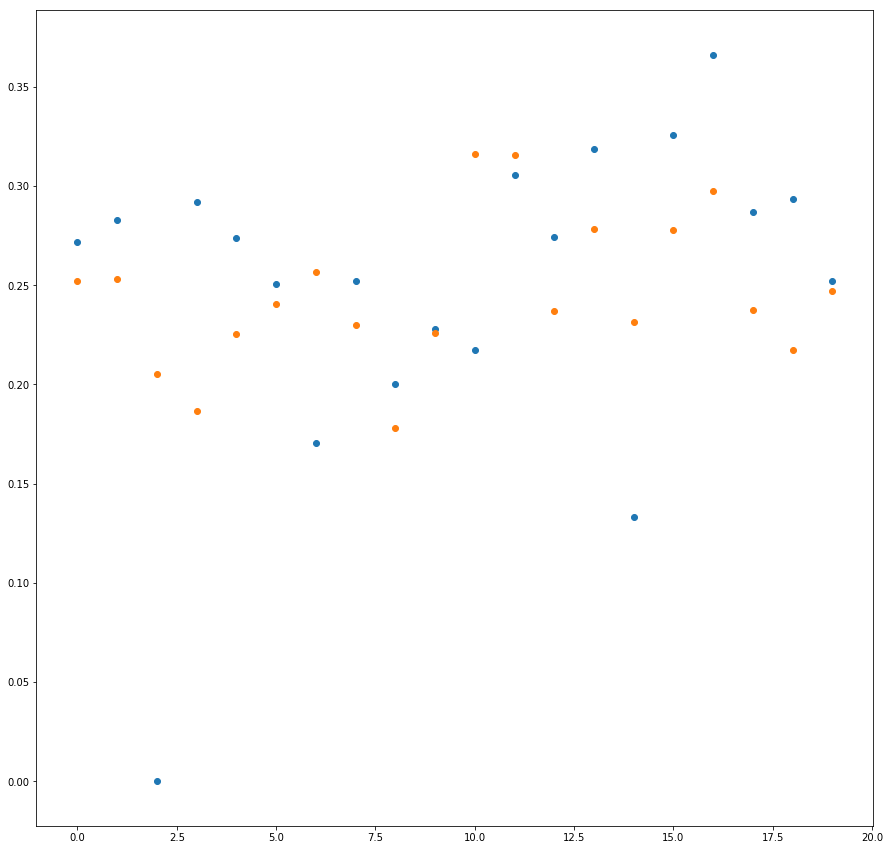

In [195]:
fig = plt.figure(figsize=(15, 15))
plt.scatter(results_pos.index[:20], results_pos['year7_avg'][:20])
plt.scatter(results_pos.index[:20], results_pos['predicted'][:20])
plt.show()

In [196]:
results_pos.sort_values('diff')

year7_avg  predicted      diff
521   0.000000   0.286123 -0.286123
280   0.000000   0.283005 -0.283005
278   0.000000   0.253951 -0.253951
257   0.000000   0.230538 -0.230538
657   0.000000   0.227189 -0.227189
253   0.047619   0.273850 -0.226231
119   0.000000   0.221006 -0.221006
154   0.000000   0.217720 -0.217720
2     0.000000   0.205162 -0.205162
738   0.069767   0.228586 -0.158819
91    0.111111   0.269161 -0.158050
762   0.105263   0.256220 -0.150957
527   0.111111   0.262003 -0.150891
313   0.125000   0.275137 -0.150137
350   0.083333   0.232543 -0.149210
421   0.100000   0.245199 -0.145199
372   0.161290   0.305446 -0.144156
370   0.066667   0.200589 -0.133922
353   0.076923   0.210498 -0.133575
627   0.163636   0.295033 -0.131397
296   0.111111   0.241605 -0.130494
606   0.107143   0.231142 -0.123999
134   0.113636   0.235750 -0.122113
522   0.153846   0.274044 -0.120198
477   0.184713   0.304207 -0.119494
699   0.158537   0.264234 -0.105698
467   0.159420   0.263736 -0.104315
391   0.176471   0.280721 -0.104251
196   0.140845   0.244987 -0.104142
10    0.217143   0.316268 -0.099125
..         ...        ...       ...
681   0.351032   0.273275  0.077757
30    0.267974   0.189519  0.078455
597   0.275463   0.195968  0.079495
768   0.320388   0.240843  0.079545
508   0.308585   0.228698  0.079887
538   0.313725   0.232045  0.081681
704   0.262222   0.179774  0.082448
93    0.303207   0.220154  0.083053
743   0.300481   0.214189  0.086292
238   0.326130   0.238959  0.087171
176   0.372093   0.284588  0.087505
499   0.287425   0.198068  0.089357
465   0.300546   0.210453  0.090094
635   0.387833   0.296657  0.091176
166   0.335541   0.243555  0.091986
802   0.297203   0.204887  0.092316
3     0.291855   0.186428  0.105427
48    0.291246   0.185692  0.105554
530   0.284351   0.175844  0.108507
165   0.345930   0.234293  0.111637
324   0.283843   0.169362  0.114481
104   0.252336   0.136146  0.116190
551   0.320000   0.195835  0.124165
38    0.342105   0.216911  0.125194
65    0.279070   0.153402  0.125668
330   0.242105   0.111623  0.130482
433   0.361702   0.227234  0.134468
741   0.333333   0.163958  0.169376
221   1.000000   0.218856  0.781144
426   1.000000   0.197721  0.802279

[815 rows x 3 columns]

In [225]:
def trim_batters(df):
    # remove those seasons where batter had less than 100 ABs
    bat_with_pos_df = bat_with_pos_df[bat_with_pos_df['AB'] > 100]

    # remove batters with less than 7 years experience
    s = bat_with_pos_df['playerID'].value_counts()
    bat_with_pos_df = bat_with_pos_df[bat_with_pos_df['playerID'].isin(s[s > 6].index)]

    # select first 7 seasons
    bat_with_pos_df = bat_with_pos_df.groupby('playerID').head(7)

In [229]:
new_df = dc.trim_batters(bat_with_pos_df)

In [259]:
# this gets nth row (year) of a player and converts to dict
bat_with_pos_df.groupby('playerID').nth(6).T.to_dict('index')

{'2B': {'aaronha01': 20,
  'aaronto01': 2,
  'abbated01': 16,
  'abbotku01': 17,
  'abramca01': 12,
  'abreubo01': 50,
  'adairje01': 20,
  'adamsbe01': 4,
  'adamsbo03': 25,
  'adamsgl01': 10,
  'adamssp01': 14,
  'adcocjo01': 23,
  'ageeto01': 12,
  'agnewsa01': 7,
  'aguaylu01': 6,
  'aikenwi01': 7,
  'ainsmed01': 4,
  'aldremi01': 13,
  'alexaga01': 4,
  'alexama01': 0,
  'alexama02': 11,
  'alfoned01': 22,
  'alicelu01': 26,
  'allanan01': 1,
  'allenbe01': 12,
  'allenbo01': 1,
  'allench01': 1,
  'allendi01': 23,
  'allenet01': 6,
  'allenga01': 1,
  'allenha02': 2,
  'alleyge01': 3,
  'allisbo01': 27,
  'allisdo01': 2,
  'almadme01': 6,
  'almonbi01': 4,
  'alomaro01': 25,
  'alomasa01': 18,
  'alomasa02': 15,
  'alonsyo01': 34,
  'aloufe01': 26,
  'alouje01': 19,
  'alouma01': 18,
  'aloumo01': 29,
  'altmage01': 7,
  'altuvjo01': 39,
  'alvarlu01': 4,
  'alvarpe01': 20,
  'alvisma01': 17,
  'amalfjo01': 19,
  'amarari01': 5,
  'amarial01': 10,
  'amaroru01': 7,
  'amaroru02':

In [239]:
bat_with_pos_df.groupby('playerID').head(2)

playerID  yearID    G   AB    R    H  2B  3B  HR    RBI    SB    CS  \
9      aaronha01    1954  122  468   58  131  27   6  13   69.0   2.0   2.0   
10     aaronha01    1955  153  602  105  189  37   9  27  106.0   3.0   1.0   
32     aaronto01    1962  141  334   54   77  20   2   8   38.0   6.0   0.0   
33     aaronto01    1963   72  135    6   27   6   1   1   15.0   0.0   3.0   
52      abadan01    2001    1    1    0    0   0   0   0    0.0   0.0   0.0   
53      abadan01    2003    9   17    1    2   0   0   0    0.0   0.0   1.0   
63     abadijo01    1875   12   49    4   11   0   0   0    5.0   1.0   0.0   
64     abbated01    1897    3   10    0    3   0   0   0    0.0   0.0   0.0   
65     abbated01    1898   25   92    9   21   4   0   0   14.0   4.0   0.0   
78     abbeych01    1893   31  116   11   30   1   4   0   12.0   9.0   0.0   
79     abbeych01    1894  129  523   95  164  26  18   7  101.0  31.0   0.0   
84     abbotfr01    1903   77  255   25   60  11   3   1   25.0   8.0   0.0   
85     abbotfr01    1904   41  130   14   22   4   2   0   12.0   2.0   0.0   
98     abbotje01    1997   19   38    8   10   1   0   1    2.0   0.0   0.0   
99     abbotje01    1998   89  244   33   68  14   1  12   41.0   3.0   3.0   
113    abbotku01    1993   20   61   11   15   1   0   3    9.0   2.0   0.0   
114    abbotku01    1994  101  345   41   86  17   3   9   33.0   3.0   0.0   
126    abbotod01    1910   22   70    2   13   2   1   0    6.0   3.0   0.0   
144    abercda01    1871    1    4    0    0   0   0   0    0.0   0.0   0.0   
145    abercre01    2006  111  255   39   54  12   2   5   24.0   6.0   5.0   
146    abercre01    2007   35   76   16   15   3   0   2    5.0   7.0   1.0   
149    abernbr01    2001   79  304   43   82  17   1   5   33.0   8.0   3.0   
150    abernbr01    2002  117  463   46  112  18   4   2   40.0  10.0   4.0   
172    aberscl01    1947   47  140   24   39   6   3   4   20.0   0.0   0.0   
173    aberscl01    1948   12   32    1    6   1   0   1    6.0   0.0   0.0   
178    abnersh01    1987   16   47    5   13   3   1   2    7.0   1.0   0.0   
179    abnersh01    1988   37   83    6   15   3   0   2    5.0   0.0   1.0   
184    abramca01    1949    8   24    6    2   1   0   0    0.0   1.0   0.0   
185    abramca01    1950   38   44    5    9   1   0   0    4.0   0.0   0.0   
194    abreubo01    1996   15   22    1    5   1   0   0    1.0   0.0   0.0   
...          ...     ...  ...  ...  ...  ...  ..  ..  ..    ...   ...   ...   
96477   zinnfr01    1888    2    7    0    0   0   0   0    0.0   0.0   0.0   
96478   zinngu01    1911    9   27    5    4   0   2   0    1.0   0.0   0.0   
96479   zinngu01    1912  106  401   56  105  15  10   6   55.0  17.0   0.0   
96489  zinteal01    2002   39   44    5    6   2   0   2    3.0   0.0   0.0   
96490  zinteal01    2004   28   34    2    7   2   0   1    6.0   0.0   0.0   
96491  zipfebu01    1961   50  170   17   34   7   5   4   18.0   1.0   1.0   
96492  zipfebu01    1962   68  184   21   44   4   1   6   21.0   1.0   2.0   
96493   ziskri01    1971    7   15    2    3   1   0   1    2.0   0.0   0.0   
96494   ziskri01    1972   17   37    4    7   3   0   0    4.0   0.0   0.0   
96521  zitzmbi01    1919   13   27    5    5   1   0   0    2.0   2.0   0.0   
96522  zitzmbi01    1925  104  301   53   76  13   3   0   21.0  11.0  11.0   
96529  zobribe01    2006   52  183   10   41   6   2   2   18.0   2.0   3.0   
96530  zobribe01    2007   31   97    8   15   2   0   1    9.0   2.0   0.0   
96541  zoccope01    2003   20   37    0    4   1   0   0    3.0   0.0   0.0   
96551  zoskyed01    1991   18   27    2    4   1   1   0    2.0   0.0   0.0   
96552  zoskyed01    1992    8    7    1    2   0   1   0    1.0   0.0   0.0   
96567  zuberjo01    1996   30   91    7   23   4   0   1   10.0   1.0   0.0   
96568  zuberjo01    1998   38   45    6   11   3   1   2    6.0   0.0   0.0   
96569  zuletju01    2000   30   68   13   20   8   0   3  

In [260]:
panel_dict = defaultdict(dict)
for i in range(7):
    year = 'year' + str(i + 1)
    panel_dict[year] = new_df.groupby('playerID').nth(i).T.to_dict('index')

In [261]:
panel_dict

defaultdict(dict,
            {'year1': {'2B': {'aaronha01': 27,
               'abbotku01': 17,
               'abreubo01': 10,
               'adairje01': 21,
               'adamsbo03': 13,
               'adamssp01': 12,
               'adcocjo01': 16,
               'ageeto01': 27,
               'ainsmed01': 1,
               'aldremi01': 18,
               'alfoned01': 13,
               'alicelu01': 10,
               'allenbe01': 27,
               'allendi01': 38,
               'allenet01': 26,
               'alleyge01': 3,
               'allisbo01': 18,
               'allisdo01': 10,
               'almonbi01': 18,
               'alomaro01': 24,
               'alomasa01': 1,
               'alomasa02': 26,
               'aloufe01': 9,
               'alouje01': 11,
               'alouma01': 7,
               'aloumo01': 28,
               'altmage01': 14,
               'altuvjo01': 10,
               'alvarpe01': 21,
               'alvisma01': 32,
               'a

In [262]:
panel = pd.Panel(panel_dict)

In [263]:
panel

<class 'pandas.core.panel.Panel'>
Dimensions: 7 (items) x 2348 (major_axis) x 19 (minor_axis)
Items axis: year1 to year7
Major_axis axis: aaronha01 to zobribe01
Minor_axis axis: 2B to yearID

In [267]:
pd.DataFrame(panel['year3'])

2B  3B   AB   BB  CS    G GIDP    H HBP  HR IBB    R  RBI  SB SF  \
aaronha01  34  14  609   37   4  153   21  200   2  26   6  106   92   2  7   
abbotku01  18   7  320   22   3  109    7   81   3   8   1   37   33   3  0   
abreubo01  35  11  546  109   9  152   13  183   3  20   8  118   93  27  4   
adairje01  21   3  382    9   3  109   17   87   2   6   2   34   30   3  5   
adamsbo03  20   3  262   25   0   87    5   78   1   1   0   33   21   6  0   
adamssp01  29   8  627   44  12  149    0  180   7   2   0   95   48  26  0   
adcocjo01  22   4  378   23   4  117   10  105   1  13   0   43   52   1  0   
ageeto01   12   3  368   15   8  132    8   80   4   5   3   30   17  13  1   
ainsmed01   7   2  186   14   0   61    0   42   0   0   0   22   22   4  0   
aldremi01  15   0  389   56   5  139   10  104   0   3  13   44   50   6  3   
alfoned01  27   2  518   63   6  151    4  163   5  10   0   84   72  11  5   
alicelu01  19   3  362   47   1  115    9  101   4   3   2   50   46  11  7   
allenbe01   8   1  243   33   2   74    5   52   1   6   7   28   20   1  1   
allendi01  25  10  524   68   6  141    9  166   3  40  13  112  110  10  4   
allenet01  27  11  538   20   0  143    0  157   0   6   0   69   64  21  0   
alleyge01  28  10  579   27   8  147    8  173   5   7   0   88   43   8  3   
allisbo01  21   3  556  103   7  159   17  136   5  29   1   83  105   2  8   
allisdo01   6   0  128    3   0   30    2   34   0   0   0   17   11   0  0   
almonbi01   3   0  198   21   5  100    1   45   0   1   7   20    8   6  2   
alomaro01  27   5  586   48   7  147   16  168   2   6   1   80   60  24  5   
alomasa01  12   2  617   40   3  156    5  153   0   1   2   68   34  20  0   
alomasa02  16   0  299   13   3   89    7   75   5   2   3   22   26   3  0   
aloufe01   17   3  322   16   2  106    9   85   2   8   1   48   44  10  4   
alouje01   13   1  370    9   5  110   14   96   2   1   1   41   20   5  2   
alouma01    4   2  250   11   3  110    3   66   3   1   3   28   14   5  1   
aloumo01   31   5  422   42   6  107    7  143   2  22  10   81   78   7  5   
altmage01  28  12  518   40   2  138    4  157   4  27   3   77   96   6  7   
altuvjo01  31   2  626   32  13  152   24  177   2   5   5   64   52  35  8   
alvarpe01  25   1  525   57   0  149   10  128   1  30   6   64   85   1  3   
alvisma01  24   2  604   47   8  159    9  149   9  21   4   88   61  12  5   
...        ..  ..  ...  ...  ..  ...  ...  ...  ..  ..  ..  ...  ...  .. ..   
wynnji01   30   7  564   84   4  157   12  155   5  22   3   90   73  43  5   
wyrosjo01  24   9  512   52   0  136    5  140   3  17   0   74   76   7  0   
yastrca01  40   3  570   95   5  151   12  183   1  14   6   91   68   8  1   
yeagejo01   6   5  161    5   0   50    0   39   4   1   0   17   23   0  0   
yeagest01  16   1  316   32   2   94    7   84   2  12   5   41   41   2  3   
yorkru01   16   1  329   41   0  102    8  101   2  20   0   66   68   5  0   
yorkto01   11   7  278    3   1   57    0   84   0   2   0   70   50   4  0   
yosted01   19   7  435   91   3  124   11  110   1   9   0   57   45   3  0   
youklke01  35   2  528   77   2  145    9  152  15  16   0   85   83   4  5   
youngch04  28   4  433   59   4  134    3   92   4  15   2   54   42  11  2   
youngde03  28   4  575   35   5  152   19  167   7  10   7   80   69  14  5   
youngdm01  30   2  373   30   1  127   11  112   2  14   1   63   56   3  4   
younger01  13   1  228   38   7   90    3   62   2   7   1   37   30  18  2   
youngjo02  37   5  590   60  13  158    7  162   7  16   7   90   60  18  4   
youngke01   9   0  181    8   3   56    5   42   2   6   0   13   22   1  3   
youngmi02  33   9  666   36   2  160   14  204   1  14   1  106   72  13  7   
youngra01  18   2  503   61   0  141    0  116   3   1   0   64   35   8  0   
youngro01  27  14  581   75  18  153    0  204   2   6   0   92   78  18  0   
yountro01  19   3  638   38  11  161   13  161   0   2   3   

In [274]:
trimmed_df = dc.trim_batters(bat_with_pos_df)
trimmed_df['AVG'] = trimmed_df['H'] / trimmed_df['AB']
trimmed_df.drop(['H', 'AB'], axis=1, inplace=True)
trimmed_df

playerID  yearID    G    R  2B  3B  HR    RBI    SB    CS   BB     SO  \
9      aaronha01    1954  122   58  27   6  13   69.0   2.0   2.0   28   39.0   
10     aaronha01    1955  153  105  37   9  27  106.0   3.0   1.0   49   61.0   
11     aaronha01    1956  153  106  34  14  26   92.0   2.0   4.0   37   54.0   
12     aaronha01    1957  151  118  27   6  44  132.0   1.0   1.0   57   58.0   
13     aaronha01    1958  153  109  34   4  30   95.0   4.0   1.0   59   49.0   
14     aaronha01    1959  154  116  46   7  39  123.0   8.0   0.0   51   54.0   
15     aaronha01    1960  153  102  20  11  40  126.0  16.0   7.0   60   63.0   
114    abbotku01    1994  101   41  17   3   9   33.0   3.0   0.0   16   98.0   
115    abbotku01    1995  120   60  18   7  17   60.0   4.0   3.0   36  110.0   
116    abbotku01    1996  109   37  18   7   8   33.0   3.0   3.0   22   99.0   
117    abbotku01    1997   94   35  18   2   6   30.0   3.0   1.0   14   68.0   
118    abbotku01    1998   77   26  13   1   5   24.0   2.0   1.0   12   53.0   
119    abbotku01    1999   96   41  17   2   8   41.0   3.0   2.0   16   69.0   
120    abbotku01    2000   79   22   7   1   6   12.0   1.0   1.0   14   51.0   
195    abreubo01    1997   59   22  10   2   3   26.0   7.0   2.0   21   48.0   
196    abreubo01    1998  151   68  29   6  17   74.0  19.0  10.0   84  133.0   
197    abreubo01    1999  152  118  35  11  20   93.0  27.0   9.0  109  113.0   
198    abreubo01    2000  154  103  42  10  25   79.0  28.0   8.0  100  116.0   
199    abreubo01    2001  162  118  48   4  31  110.0  36.0  14.0  106  137.0   
200    abreubo01    2002  157  102  50   6  20   85.0  31.0  12.0  104  117.0   
201    abreubo01    2003  158   99  35   1  20  101.0  22.0   9.0  109  126.0   
311    adairje01    1961  133   41  21   1   9   37.0   5.0   2.0   35   51.0   
312    adairje01    1962  139   67  29   4  11   48.0   7.0   7.0   27   77.0   
313    adairje01    1963  109   34  21   3   6   30.0   3.0   3.0    9   51.0   
314    adairje01    1964  155   56  20   3   9   47.0   3.0   2.0   28   72.0   
315    adairje01    1965  157   51  26   3   7   66.0   6.0   4.0   35   65.0   
316    adairje01    1966  122   30  19   2   4   39.0   3.0   2.0   21   52.0   
317    adairje01    1967  117   47  17   1   3   35.0   1.0   5.0   17   52.0   
366    adamsbo03    1946   94   35  13   3   4   24.0  16.0   0.0   18   32.0   
367    adamsbo03    1947   81   39  11   2   4   20.0   9.0   0.0   25   23.0   
...          ...     ...  ...  ...  ..  ..  ..    ...   ...   ...  ...    ...   
96420  zimmedo01    1961  128   57  25   4  13   40.0   5.0   1.0   25   70.0   
96421  zimmedo01    1962   77   19  12   2   2   17.0   1.0   3.0   17   40.0   
96428  zimmehe01    1908   46   17   4   1   0    9.0   2.0   0.0    1    0.0   
96429  zimmehe01    1909   65   23   9   2   0   21.0   7.0   0.0    3    0.0   
96430  zimmehe01    1910   99   35  16   6   3   38.0   7.0   0.0   20   36.0   
96431  zimmehe01    1911  143   80  22  17   9   85.0  23.0   0.0   25   50.0   
96432  zimmehe01    1912  145   95  41  14  14   99.0  23.0   0.0   38   60.0   
96433  zimmehe01    1913  127   69  28  12   9   95.0  18.0   0.0   41   40.0   
96434  zimmehe01    1914  146   75  36  12   4   87.0  17.0   0.0   20   46.0   
96463  zimmery01    2006  157   84  47   3  20  110.0  11.0   8.0   61  120.0   
96464  zimmery01    2007  162   99  43   5  24   91.0   4.0   1.0   61  125.0   
96465  zimmery01    2008  106   51  24   1  14   51.0   1.0   1.0   31   71.0   
96466  zimmery01    2009  157  110  37   3  33  106.0   2.0   0.0   72  119.0   
96467  zimmery01    2010  142   85  32   0  25   85.0   4.0   1.0   69   98.0   
96468  zimmery01    2011  101   52  21   2  12   49.0   3.0   1.0   41   73.0   
96469  zimmery01    2012  145   93  36   1  25   95.0   5.0   2.0   57  116.0   
96495   ziskri01    1973  103   44  23   7  10   54.0   0.0   0.0   21   63.0   
96496   ziskri01    1974  149   75  30 

In [277]:
condensed_df = dc.condense_df(trimmed_df)
condensed_df.set_index('playerID', drop=True, inplace=True)
condensed_df

year1_2B  year1_3B  year1_AVG  year1_BB  year1_CS  year1_G  \
playerID                                                                
aaronha01        27         6   0.279915        28       2.0      122   
abbotku01        17         3   0.249275        16       0.0      101   
abreubo01        10         2   0.250000        21       2.0       59   
adairje01        21         1   0.264249        35       2.0      133   
adamsbo03        13         3   0.244373        18       0.0       94   
adamssp01        12         0   0.289389        26      19.0       95   
adcocjo01        16         1   0.293011        24       0.0      102   
ageeto01         27         8   0.273450        41      18.0      160   
ainsmed01         1         2   0.192308         6       0.0       33   
aldremi01        18         3   0.250000        33       3.0       84   
alfoned01        13         5   0.277612        12       1.0      101   
alicelu01        10         4   0.212121        25       1.0       93   
allenbe01        27         7   0.268761        62       1.0      159   
allendi01        38        13   0.318038        67       4.0      162   
allenet01        26         4   0.295265        14       0.0      111   
alleyge01         3         1   0.210526        21       1.0       81   
allisbo01        18         9   0.261404        60       8.0      150   
allisdo01        10         2   0.330827         0       1.0       27   
almonbi01        18        11   0.261011        37       9.0      155   
alomaro01        24         6   0.266055        47       6.0      143   
alomasa01         1         1   0.240741         4       5.0       67   
alomasa02        26         2   0.289888        25       1.0      132   
aloufe01          9         2   0.252747        19       2.0       75   
alouje01         11         0   0.273936        13       6.0      115   
alouma01          7         2   0.310000        15       2.0       81   
aloumo01         28         2   0.281525        25       2.0      115   
altmage01        14         4   0.245238        34       0.0      135   
altuvjo01        10         1   0.276018         5       3.0       57   
alvarpe01        21         1   0.256484        37       0.0       95   
alvisma01        32         7   0.274086        36       7.0      158   
...             ...       ...        ...       ...       ...      ...   
wynnji01         10         5   0.244000        30       2.0       70   
wyrosjo01        30         4   0.280734        70       0.0      145   
yastrca01        31         6   0.265866        50       5.0      148   
yeagejo01         5         1   0.171642         7       0.0       43   
yeagest01         0         1   0.273585        16       0.0       35   
yorkru01         18         3   0.306667        41       2.0      104   
yorkto01          5         7   0.255172         9       2.0       29   
yosted01         17         3   0.238318        45       5.0      115   
youklke01        11         0   0.259615        33       1.0       72   
youngch04        29         3   0.237258        43       6.0      148   
youngde03         9         1   0.317460         1       2.0       30   
youngdm01        14         3   0.258258        38       5.0      110   
younger01         1         0   0.257576         8       1.0       49   
youngjo02        13         1   0.244019        16       5.0       95   
youngke01        24         3   0.236080        36       2.0      141   
youngmi02        18         4   0.248705        26       1.0      106   
youngra01         6         5   0.243386        53      11.0      123   
youngro01        16         8   0.301688        44       0.0      121   
yountro01        14         5   0.250000        12       7.0      107   
zarilal01         7         1   0.254386        17       1.0       70   
zaungr01          5         0   0.259615        16       1.0       40   
zeidero01         9         2   0.216867        62       0.0      136

In [279]:
X_all = condensed_df
y_all = X_all.pop('year7_AVG')

In [281]:
X_train_all, X_test_all, y_train_all, y_true_all = train_test_split(X_all, y_all, test_size=0.2)

In [283]:
regr_all = RandomForestRegressor()
regr_all.fit(X_train_all, y_train_all)
y_all_pred = regr_all.predict(X_test_all)

In [285]:
results_all = pd.DataFrame(data=y_true_all)
results_all['predicted'] = y_all_pred
results_all['difference'] = results_all['year7_AVG'] - results_all['predicted']
results_all.reset_index(drop=True, inplace=True)
results_all

year7_AVG  predicted  difference
0     0.283730   0.297493   -0.013763
1     0.243590   0.263770   -0.020180
2     0.240000   0.253448   -0.013448
3     0.270153   0.275472   -0.005320
4     0.247191   0.234354    0.012837
5     0.307155   0.299919    0.007236
6     0.233333   0.254632   -0.021298
7     0.208333   0.236709   -0.028376
8     0.246429   0.262752   -0.016323
9     0.236667   0.211783    0.024884
10    0.306748   0.279378    0.027370
11    0.323529   0.291460    0.032070
12    0.313531   0.278797    0.034734
13    0.302663   0.275697    0.026966
14    0.253968   0.257300   -0.003332
15    0.249258   0.243208    0.006050
16    0.292225   0.280059    0.012166
17    0.235294   0.259012   -0.023718
18    0.272097   0.263615    0.008482
19    0.344507   0.321008    0.023499
20    0.250602   0.247993    0.002610
21    0.282353   0.270585    0.011768
22    0.298969   0.256391    0.042578
23    0.238298   0.227869    0.010429
24    0.259542   0.250859    0.008683
25    0.340242   0.301443    0.038799
26    0.261438   0.256534    0.004904
27    0.272222   0.270746    0.001476
28    0.273885   0.259984    0.013902
29    0.247934   0.220475    0.027459
..         ...        ...         ...
440   0.246231   0.241886    0.004345
441   0.234940   0.266118   -0.031178
442   0.298077   0.297870    0.000207
443   0.258182   0.292014   -0.033832
444   0.296748   0.260026    0.036722
445   0.309603   0.292261    0.017342
446   0.285714   0.279224    0.006490
447   0.255462   0.278570   -0.023108
448   0.223827   0.267447   -0.043620
449   0.236074   0.269918   -0.033843
450   0.313253   0.286384    0.026869
451   0.202128   0.232577   -0.030450
452   0.251208   0.256291   -0.005083
453   0.315603   0.297550    0.018053
454   0.265683   0.267908   -0.002225
455   0.221925   0.259187   -0.037262
456   0.260714   0.265280   -0.004565
457   0.234234   0.221652    0.012582
458   0.305419   0.251826    0.053593
459   0.290541   0.275336    0.015205
460   0.302752   0.254112    0.048641
461   0.222997   0.222460    0.000537
462   0.211538   0.211165    0.000374
463   0.312834   0.258504    0.054330
464   0.270531   0.258162    0.012369
465   0.293103   0.246276    0.046828
466   0.264205   0.264804   -0.000600
467   0.222798   0.243862   -0.021064
468   0.282714   0.271986    0.010728
469   0.258333   0.282496   -0.024163

[470 rows x 3 columns]

In [286]:
# Random Forest Regression results with all stats sans H and AB
mse_all = mean_squared_error(y_true_all, y_all_pred)
rmse_all = mse_all**0.5
score_all = regr_all.score(X_test_all, y_true_all)
print('MSE: {:.3f}\n'\
      'RMSE: {:.3f}\n'\
      'Score: {:.3f}'.format(mse_all, rmse_all, score_all))

MSE: 0.001
RMSE: 0.027
Score: 0.454
